<a href="https://colab.research.google.com/github/abubaker909/Stock_Price_Predictor_Using_KNN/blob/main/Stock_Price_Predictor_Using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install quandl
import quandl

In [3]:
data = quandl.get("WIKI/GOOGL")

In [4]:
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


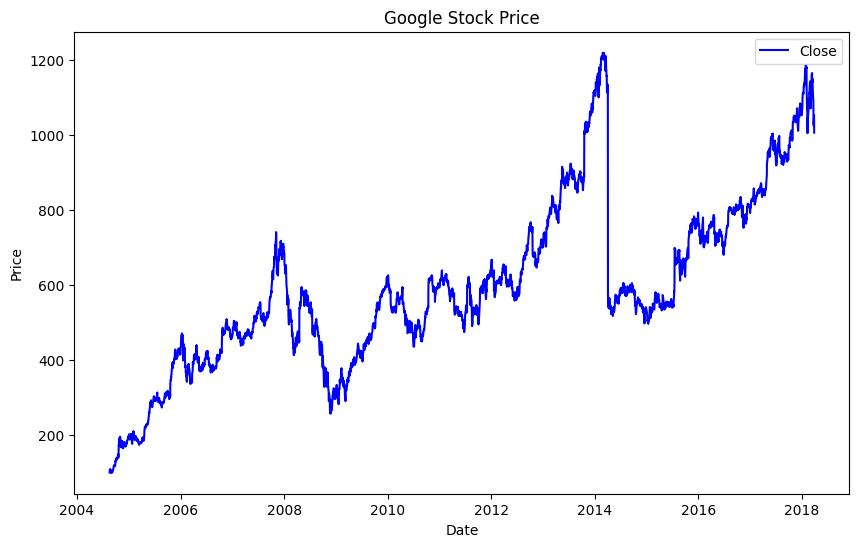

In [10]:
plt.figure(figsize=(10, 6))

plt.plot(data['Close'], label='Close', linestyle='-', color='blue')

plt.title('Google Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [11]:
data['open-close'] = data['Open'] - data['Close']
data['high-low'] = data['High'] - data['Low']
data = data.dropna()

In [12]:
X = data[['open-close', 'high-low']]
X.head()

,open-close,high-low
Date,,
2004-08-19,-0.325,8.10
2004-08-20,-7.300,8.58
2004-08-23,1.360,4.43
2004-08-24,6.370,8.03
2004-08-25,-1.240,4.12


In [13]:
Y = np.where(data['Close'].shift(-1) > data['Close'], 1, -1)
Y

array([ 1,  1, -1, ...,  1, -1, -1])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=44)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

model.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print('Best Params: ', model.best_params_)
print('Accuracy Train: ', accuracy_train)
print('Accuracy Test: ', accuracy_test)

Best Params:  {'n_neighbors': 5}
Accuracy Train:  0.6950934579439252
Accuracy Test:  0.5105140186915887


In [17]:
predication_classification = model.predict(X_test)

In [18]:
actual_predicated_data = pd.DataFrame({'Actual': Y_test, 'Predicted': predication_classification})
actual_predicated_data.head(10)

,Actual,Predicted
0,-1,1
1,1,1
2,-1,-1
3,1,-1
4,-1,-1
5,1,-1
6,-1,1
7,1,1
8,1,-1
9,1,1


In [16]:
Y = data['Close']

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data
X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X, Y, test_size=0.25, random_state=44)

# Defining the parameter grid
params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

# Initializing KNeighborsRegressor
knn_reg = KNeighborsRegressor()

# Performing GridSearchCV
model = GridSearchCV(knn_reg, params, cv=5)

# Fitting the model
model.fit(X_train_reg, Y_train_reg)

# Making predictions
train_predictions = model.predict(X_train_reg)
test_predictions = model.predict(X_test_reg)

# Evaluating the model
mse_train = mean_squared_error(Y_train_reg, train_predictions)
mse_test = mean_squared_error(Y_test_reg, test_predictions)
r2_train = r2_score(Y_train_reg, train_predictions)
r2_test = r2_score(Y_test_reg, test_predictions)

print('Best Params: ', model.best_params_)
print('Mean Squared Error Train: ', mse_train)
print('Mean Squared Error Test: ', mse_test)
print('R2 Score Train: ', r2_train)
print('R2 Score Test: ', r2_test)


Best Params:  {'n_neighbors': 15}
Mean Squared Error Train:  40551.93860632955
Mean Squared Error Test:  46683.01527007416
R2 Score Train:  0.20745112387887532
R2 Score Test:  0.10847063738726159


In [27]:
predications = model.predict(X_test_reg)
print(predications)

[482.57666667 427.23866667 613.258      789.90333333 674.29126
 654.702      690.0008     595.41266667 631.07133333 648.32734
 638.45333333 583.458      624.816      695.28866667 710.172
 527.67466    703.71933333 586.92866667 477.958      685.09666667
 659.28733333 653.39933333 612.56533333 713.83332667 604.90666667
 596.14133333 358.516      676.29588    640.05532667 536.888
 517.615      529.88046667 635.03600667 497.46       372.30733333
 594.54466667 703.3784     734.02133333 511.65546667 608.85200667
 595.68133333 620.97333333 629.70266667 703.18592667 662.868
 550.78066667 571.98333333 607.01266667 530.04       442.80066667
 502.92266667 611.05466667 471.45517333 614.5314     257.6656
 802.332      612.63066667 645.10466667 528.39066667 600.132
 617.07       655.2188     586.33933333 640.32       443.734
 515.344      530.33666667 463.522      409.18893333 622.979
 536.61633333 614.49066667 556.69533333 612.62733333 487.31933333
 632.242      735.382      729.25996667 532.744   

In [22]:
rms = np.sqrt(np.mean(np.power((np.array(Y_test)-np.array(predications)),2)))
rms

606.7131331937845

In [23]:
valid = pd.DataFrame({'Actual': Y_test_reg, 'Predicted': predications})
valid.head(10)

,Actual,Predicted
Date,,
2006-11-17,498.790,482.576667
2016-11-25,780.230,427.238667
2006-06-13,386.525,613.258000
2015-08-25,612.470,789.903333
2006-02-01,401.780,674.291260
2018-01-10,1110.140,654.702000
2018-02-21,1113.750,690.000800
2012-05-07,607.550,595.412667
2007-11-19,625.850,631.071333
